# **3D Classification pipeline**
___  
  
In this notebook, we demonstrate the use of the [BiaPy](https://biapy.readthedocs.io/en/latest/) pipeline for **3D classification** of microscopy data.

<figure>
<center>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_003_0.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_012_1.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_005_2.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_000_3.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_002_4.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_001_5.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_026_6.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_031_7.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_006_8.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_004_9.gif?raw=true' width='80px'/>
<img src='https://github.com/danifranco/BiaPy-doc/blob/master/source/img/classification/MedMNIST_OrganMNIST3D_img_015_10.gif?raw=true' width='80px'/>
<figcaption><b>Figure 1</b>: Example of a 3D classification problem. These examples belong to various classes and were sourced from  <a href="https://medmnist.com/">MedMNIST v2</a>, specifically from the OrganMNIST3D dataset which is based on 3D computed tomography (CT) images from <a href="https://arxiv.org/abs/1901.04056">Liver Tumor Segmentation Benchmark (LiTS)</a>.</figcaption></center>
</figure>

Without any coding, we'll guide you step-by-step through the process to:
1. **Upload a set of training and test images** along with their corresponding instance label images.
2. **Train a Deep Neural Network (DNN)** model using the training set.
3. **Apply the model** to the test images.
4. **Download the segmentation results** to your local machine.

**Disclaimer:** The structure of the notebook is heavily inspired by the fantastic [ZeroCostDL4Mic notebooks](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki).

**Contact:** This notebook was created by [Ignacio Arganda-Carreras](mailto:ignacio.arganda@ehu.eus) and [Daniel Franco-Barranco](mailto:daniel.franco@dipc.org). For suggestions, comments, or issues, please reach out to us via email or [create an issue in BiaPy's repository](https://github.com/danifranco/BiaPy/issues). Thank you!

## **Expected Inputs and Outputs**
___

### **Inputs**

This notebook expects the following folders as input:

1. **Training Raw Images**: Contains the raw 3D images used for training the model.
2. **Test Raw Images**: Houses the raw 3D images for testing the model.
3. **Output Folder**: A designated path where the classification results will be saved.

### **Outputs**

Upon successful execution, a new folder will be generated, housing the classification results. The results will be saved in a CSV file, which can be easily downloaded at the end of this notebook.

<font color='red'><b>Note:</b></font> For testing purposes, you can utilize the **example datasets provided under 'Manage File(s) Source > Option 3'**.





## **Prepare the environment**
___

Establish connection with Google services. You **must be logged in to Google** to continue.
Since this is not Google's own code, you will probably see a message warning you of the dangers of running unfamiliar code. This is completely normal.


## **Manage File(s) Source**
---

The input folder can be provided using three different options:
1. **Direct Upload**: Directly upload the desired folder.
2. **Google Drive**: Use a folder stored in your Google Drive.
3. **Sample Data**: Use a sample dataset provided by us.

The steps you'll need to follow vary depending on your chosen option. These steps are detailed in the subsequent sections.


### **Option 1: Upload Local Files to the Notebook**
---

To use this option, you will be prompted to upload your files to Colab. The uploaded files will be stored in the `/content/input/` directory. Ensure that you upload a ZIP file that contains the 'train', 'val' (if applicable), and 'test' folders.

In [ ]:
#@markdown ##Play the cell to upload local files in a .zip file (train raw images)
from google.colab import files
!mkdir -p /content/input/train/
%cd /content/input/train/
uploaded = files.upload()
filename = list(uploaded.keys())[0]
if not filename.endswith('.zip'):
    raise ValueError("{} file uploaded has not .zip extension".format(filename))
!unzip -q {filename}
%cd /content

### **Option 2: Mount Your Google Drive**
---

If you wish to use this notebook with data from your Google Drive, you'll first need to mount the drive to this notebook.

Execute the cell below to initiate the Google Drive mounting process. A link will be displayed click on it. In the new browser window that opens, choose your drive and click 'Allow'. Copy the code that appears, return to this notebook, paste the code into the cell, and press 'Enter'. This action grants Colab access to your Google Drive data.

After this process, you can access your data via the **Files** tab, located on the top left of this notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

### **Option 3: download an example dataset**
---
Don't have data readily available but still want to test the notebook? No problem! Simply execute the following cell to download a sample dataset.

Specifically, we'll use the [MedMNIST v2](https://medmnist.com/") dataset, concretely OrganMNIST3D dataset which is publicly available online.

In [ ]:
#@markdown ##Play to download an example dataset

import os

os.chdir('/content/')
!curl -L -s -o DermaMNIST.zip 'https://drive.google.com/uc?id=1pypWJ4Z9sRLPlVHbG6zpwmS6COkm3wUg&confirm=t'

!unzip -q DermaMNIST.zip
!rm DermaMNIST.zip

print('Dataset downloaded and unzipped under /content/data')


Dataset downloaded and unzipped under /content/data


## **Check for GPU Access**
---

By default, the session is configured to use Python 3 with GPU acceleration. However, it's a good practice to double-check these settings:

1. Navigate to **Runtime** in the top menu and select **Change the Runtime type**.
2. Ensure the following settings:
   - **Runtime type:** Python 3 (This program is written in the Python 3 programming language.)
   - **Accelerator:** GPU (Graphics Processing Unit)

This will ensure that you're using Python 3 and taking advantage of GPU acceleration.

## **Paths for Input Images and Output Files**
___

- **Option 1 (Upload folder) or Option 3 (Download prepared data samples):**
  - Set `train_data_path` to `/content/data/train`
  - Set `val_data_path` to `/content/data/validation` (If you're not using validation from train, this can be ignored)
  - Set `test_data_path` to `/content/data/test`
  - Set `output_path` to `/content/out`
  
 **Note**: Ensure you download your results from the `/content/out` directory after the process!

- **Option 2 (Use Google Drive paths):**
  - Insert the paths to your input files and your desired output directory here, i.e., `/content/gdrive/MyDrive/...`.

**Helpful Tip**: If you're unsure about the paths to your folders, look at the top left of this notebook for a small folder icon. Navigate through the directories until you locate your desired folder. Right-click on it and select "Copy Path" to copy the folder's path.

In [ ]:
#@markdown #####Path to train images
train_data_path = '/content/data/train' #@param {type:"string"}
#@markdown #####Path to validation images (necessary only if you do not want to extract validation from train, i.e. when **validation_from_train** variable below is **False**)
val_data_path = '/content/data/validation' #@param {type:"string"}
#@markdown #####Path to test images
test_data_path = '/content/data/test' #@param {type:"string"}
#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/output' #@param {type:"string"}

## **Install BiaPy library**


In [ ]:
#@markdown ##Play to install BiaPy and its dependences

import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms

# Clone the repo
os.chdir('/content/')
if not os.path.exists('BiaPy'):
    !git clone --depth 1 https://github.com/danifranco/BiaPy.git
    !pip install --upgrade --no-cache-dir gdown &> /dev/null
    sys.path.insert(0, 'BiaPy')
    os.chdir('/content/BiaPy')

    # # Install dependencies
    !sed -i '/pandas/d' /content/BiaPy/setup.py
    !pip install --editable .
else:
    print( 'Using existing installed version of BiaPy' )

Cloning into 'BiaPy'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 150 (delta 40), reused 57 (delta 16), pack-reused 0
Receiving objects: 100% (150/150), 26.36 MiB | 22.88 MiB/s, done.
Resolving deltas: 100% (40/40), done.


## **Configure and train the DNN model**
[BiaPy](https://biapy.readthedocs.io/en/latest/) contains a few deep learning models to perform classification.

The selection of the model and the pipeline hyperparameters can be configured by editing the YAML configuration file or (easier) by running the next cell.



### **Select your parameters**
---
#### **Name of the model**
* **`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

#### **Data management**

* **`validation_from_train`:** Select to extract validation data from the training samples. If is not selected the validation data path must be set in **val_data_path** variable above.

* **`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10**

* **`test_ground_truth`:** Select to use test data folder order as the ground truth class to measure the performance of the model's result. **Default value: True**


#### **Basic training parameters**
* **`number_of_classes`:** Input number of classes present in the problem. It must be equal to the number of subfolders in training and validation (if not extracted from train) folders.

* **`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. For the example dataset, reasonable results can already be observed after 100 epochs. **Default value: 100**

* **`patience`:**  Input how many epochs you want to wait without the model improving its results in the validation set to stop training. **Default value: 20**

#### **Advanced Parameters - experienced users only**
* **`model_architecture`:**  Select the architecture of the DNN used as backbone of the pipeline. Options: ViT, EfficientNet B0, simple CNN. **Default value: ViT**

* **`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 12**

* **`patch_size`:** Input the size of the patches use to train your model (length in pixels in X and Y). The value should be smaller or equal to the dimensions of the image. **Default value: 28**

* **`input_channels`:** Input the number of channels of your images (grayscale = 1, RGB = 3). **Default value: 3**

* **`optimizer`:** Select the optimizer used to train your model. Options: ADAM, ADAMW, Stochastic Gradient Descent (SGD). ADAM usually converges faster, while ADAMW provides a balance between fast convergence and better handling of weight decay regularization. SGD is known for better generalization.**Default value: ADAMW**

* **`initial_learning_rate`:** Input the initial value to be used as learning rate. If you select ADAM or ADAMW as optimizer, this value should be around 10e-4. **Default value: 0.0001**

In [ ]:
#@markdown ###Name of the model:
model_name = "my_3d_classification" #@param {type:"string"}

#@markdown ### Data management:
validation_from_train = False #@param {type:"boolean"}
percentage_validation =  10 #@param {type:"number"}
test_ground_truth = True #@param {type:"boolean"}

#@markdown ### Basic training parameters:
number_of_classes = 11#@param {type:"number"}
number_of_epochs =  100#@param {type:"number"}
patience =  20#@param {type:"number"}

#@markdown ### Advanced training parameters:

model_architecture = "Simple CNN" #@param ["ViT", "EfficientNetB0", "Simple CNN"]

batch_size =  8#@param {type:"number"}
patch_size = 28 #@param {type:"number"}

input_channels = 1 #@param {type:"number"}

optimizer = "ADAMW" #@param ["ADAMW", "SGD","ADAM"]
initial_learning_rate = 0.0001 #@param {type:"number"}



In [ ]:
#@markdown ##Play to download the YAML configuration file and update it to train the model
import errno

os.chdir('/content/')

job_name = model_name
yaml_file = "/content/"+str(job_name)+".yaml"

# remove previous configuration file if it exists with the same name
if os.path.exists( yaml_file ):
    os.remove( yaml_file )

# Download template file
import shutil
shutil.copy("/content/BiaPy/templates/classification/3d_classification.yaml", yaml_file)

# Check folders before modifying the .yaml file
if not os.path.exists(train_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), train_data_path)
ids = sorted(next(os.walk(train_data_path))[1])
if len(ids) == 0:
    raise ValueError("No folders found in dir {}".format(train_data_path))

if not os.path.exists(val_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), val_data_path)
ids = sorted(next(os.walk(val_data_path))[1])
if len(ids) == 0:
    raise ValueError("No folders found in dir {}".format(val_data_path))

if not os.path.exists(test_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), test_data_path)
ids = sorted(next(os.walk(test_data_path))[1])
if len(ids) == 0:
    raise ValueError("No folders found in dir {}".format(test_data_path))


# open template configuration file
import yaml
with open( yaml_file, 'r') as stream:
    try:
        biapy_config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# update paths to data
#DATA.NORMALIZATION.TYPE
biapy_config['TEST']['STATS'] = {}
biapy_config['TEST']['STATS']['PER_PATCH']=True
biapy_config['TEST']['STATS']['MERGE_PATCHES']=True
biapy_config['TEST']['STATS']['FULL_IMG']=False


biapy_config['DATA']['TRAIN']['PATH'] = train_data_path
biapy_config['DATA']['VAL']['PATH'] = val_data_path
biapy_config['DATA']['TEST']['PATH'] = test_data_path
biapy_config['DATA']['TEST']['LOAD_GT'] = test_ground_truth

# update data patch size
biapy_config['DATA']['PATCH_SIZE'] = '('+str(patch_size)+', '+ str(patch_size)+', '+ str(patch_size)+', ' + str(input_channels)+')'
# adjust test padding accordingly
padding = patch_size // 8
biapy_config['DATA']['TEST']['PADDING'] = '('+str(padding)+', '+ str(padding)+', '+str(padding)+')'

# update training parameters
biapy_config['DATA']['VAL']['FROM_TRAIN'] = validation_from_train
biapy_config['DATA']['VAL']['SPLIT_TRAIN'] = percentage_validation/100.0
biapy_config['TRAIN']['EPOCHS'] = number_of_epochs
biapy_config['TRAIN']['PATIENCE'] = patience
biapy_config['TRAIN']['BATCH_SIZE'] = batch_size
biapy_config['TRAIN']['OPTIMIZER'] = optimizer
biapy_config['TRAIN']['LR'] = initial_learning_rate

# Transcribe model architecture
# Available models: "simple_cnn", "EfficientNetB0"
architecture = "simple_cnn"
if model_architecture == "Simple CNN":
    architecture = 'simple_cnn'
elif model_architecture == "ViT":
    architecture = 'ViT'
else:
    architecture = 'EfficientNetB0'


biapy_config['MODEL']['N_CLASSES'] = number_of_classes
biapy_config['MODEL']['ARCHITECTURE'] = architecture
biapy_config['MODEL']['SPATIAL_DROPOUT'] =  True

# save file
with open( yaml_file, 'w') as outfile:
    yaml.dump(biapy_config, outfile, default_flow_style=False)

print( "Training configuration finished.")


In [ ]:
#@markdown ##OPTIONAL: Play the cell to upload initial model weights
#@markdown Use this option to start the training from a **pre-trained model** if you have one. Otherwise, skip this cell.

#@markdown **Important**: remember the weights must correspond to the selected architecture, patch size and number of input channels. Otherwise, an error will be shown when training.
from google.colab import files

#s.chdir('/content/')

uploaded = files.upload()

checkpoint_path = '/content/' + list(uploaded.keys())[0]

# open template configuration file
import yaml
with open( template_file, 'r') as stream:
    try:
        biapy_config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# update paths to data
biapy_config['PATHS'] = {}
biapy_config['PATHS']['CHECKPOINT_FILE'] = checkpoint_path

# save file
with open( yaml_file, 'w') as outfile:
    yaml.dump(biapy_config, outfile, default_flow_style=False)

print( "Training configuration finished.")

### **Train the model**
---

In [ ]:
#@markdown ##Play to train the model

import os
import errno

# Run the code
os.chdir('/content/BiaPy')
!python -u main.py --config '/content/'{job_name}'.yaml' --result_dir {output_path} --name {job_name} --run_id 1 --gpu 0



## Inspection of the loss function and the Accuracy
---

Before proceeding with interpretations, it's pivotal to gauge the training evolution by juxtaposing the training loss against the validation loss. The validation loss casts light on the model's efficacy over a reserved subset of data unseen during training. A deeper understanding can be garnered from [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

- **Training Loss**: This captures the discrepancy between the model's predictions and the actual ground-truth after each epoch.

- **Validation Loss**: This signifies the error between the model's estimates on validation images and their actual counterparts.

As training unfurls, these metrics are expected to wane, eventually plateauing at an optimal, minimal value. Contrasting the trajectories of these losses can yield vital information about the model's adaptability.

- **Decreasing Training and Validation Losses**: This trend is indicative of potential model improvements with further training. Elevating the `number_of_epochs` is advised in such scenarios. Notably, even if the loss curves seem to stabilize towards the tail end, it might be a mere visual effect due to y-axis scaling. The model is considered convergent once the curves genuinely flatten, marking the end of required training.

- **Divergent Losses**: An upward tick in validation loss while training loss gravitates towards zero hints at overfitting. It suggests that the model is intricately memorizing training patterns at the cost of broader applicability. A more substantial training dataset can alleviate this.


The **Accuracy** metric evaluates the model's performance across all classes by contrasting the target class against the predicted output. **A value gravitating towards 1 denotes peak performance.**

In [ ]:
#@markdown ##Play the cell to show a plot of training error vs. epoch number and accuracy vs epoch number
import matplotlib.pyplot as plt

loss_plot = imread( output_path + '/'+job_name+'/results/'+job_name+'_1/charts/'+job_name+'_1_loss.png' )

iou_plot = imread( output_path + '/'+job_name+'/results/'+job_name+'_1/charts/'+job_name+'_1_accuracy.png' )

fig = plt.figure( figsize = (20,10))
ax1 = plt.subplot( 1, 2, 1 )
_ = plt.imshow( loss_plot )
_ = plt.axis('off')
ax1.set_title( 'Training error vs epoch number', fontdict = {'fontsize':22})

ax2 = plt.subplot( 1, 2, 2 )
_ = plt.imshow( iou_plot )
_ = plt.axis('off')
_= ax2.set_title( 'Accuracy vs epoch number', fontdict = {'fontsize':22})

In [ ]:
#@markdown ###Play to display the path to the output CSV file

final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")

class_results = os.path.join(final_results, "predictions.csv")

print("Output paths:")
print("    Predicted test classes are in {}".format(class_results))

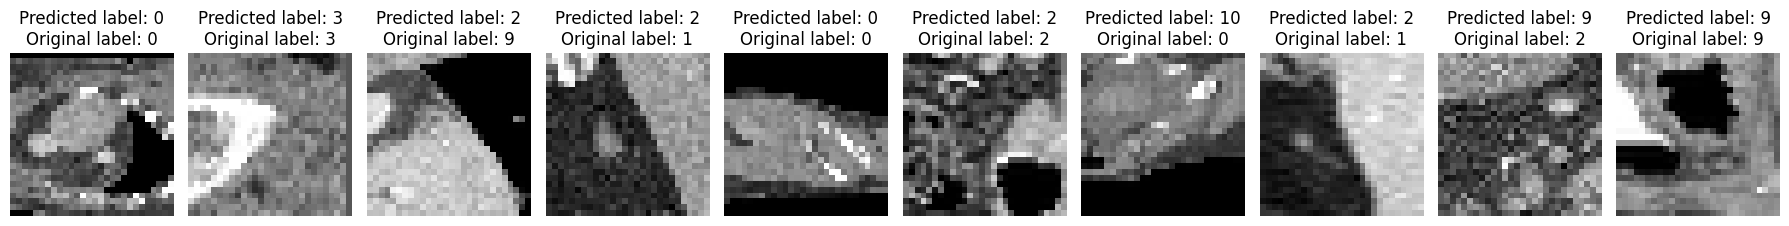

In [ ]:
#@markdown ##Visualize results and names


import pandas as pd
import matplotlib.pyplot as plt
import os

# Read CSV file with predictions
predictions_df = pd.read_csv('/content/output/'+str(job_name)+'/results/'+str(job_name)+'_1/predictions.csv')

# List the folders (classes) in order
labels = sorted([folder for folder in os.listdir(test_data_path) if os.path.isdir(os.path.join(test_data_path, folder))])

# Function to find the original class of the image
def find_original_class(filename, labels):
    for index, label in enumerate(labels):
        if filename in os.listdir(os.path.join(test_data_path, label)):
            return index
    return None

# Function for displaying images and forecasts
def display_predictions(predictions_df, labels, num_image):
    random_samples = predictions_df.sample(n=num_image)

    fig = plt.figure(figsize=(18, 18 * num_image))

    for index, (idx, row) in enumerate(random_samples.iterrows()):
        original_class = find_original_class(row['filename'], labels)
        image_path = os.path.join(test_data_path, labels[original_class], row['filename'])
        image = plt.imread(image_path)

        ax = plt.subplot(1, num_image, index + 1)
        if image.shape[-1] == 1 or image.ndim == 2:
            ax.imshow(image, cmap='gray')
        else:
            ax.imshow(image)
        if original_class == None:
          ax.set_title(f"Predicted label: {labels[row['class']]}")
        else:
          ax.set_title(f"Predicted label: {labels[row['class']]}\nOriginal label: {labels[original_class]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_predictions(predictions_df, labels, 10)

## **Download classification results**

In [ ]:
#@markdown ###Play to download the CSV file with all classification results in test.

from google.colab import files

files.download(class_results)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Download train model (weights and configuration file)**
If you want to **reuse the train model in the future**, you can download both the model weights and its configuration file (.YAML) by running the following cells.

In [ ]:
#@markdown ###Play to download the model weights

checkpoints_path = os.path.join(output_path, job_name, 'checkpoints')

weights_filename = 'model_weights_' + str( job_name ) + '_1.h5'

files.download( os.path.join( checkpoints_path, weights_filename))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@markdown ###Play to download the model configuration file (.YAML)

config_path = os.path.join(output_path, job_name, 'config_files')

files.download( os.path.join( config_path, yaml_file))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Acknowledgments**

We extend our gratitude to the [ZeroCostDL4Mic notebooks](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki) for their invaluable inspiration. Notably, we have adopted some of their descriptions concerning metrics and parameters.